<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week05/Day1/EX1/W5D1EXN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP Ninja
Last Updated: January 8th, 2024

What you will learn
how to train a logistic regression model
how to evaluate your model with metricq


What you will create
a script to implement Python functions to calculate Accuracy, Precision, Recall, and F1-Score from scratch.


Exercise 1 : Evaluation Metrics Implementation
Objective:
Implement Python functions to calculate Accuracy, Precision, Recall, and F1-Score from scratch.

Dataset:
Use any binary classification dataset, for example, the Breast Cancer Wisconsin (Diagnostic) dataset available in scikit-learn or any other binary classification dataset of your choice.

Tasks:
Split the dataset into training and test sets.
Train a simple classification model (like Logistic Regression) on the training set.
Make predictions on the test set.
Write functions to calculate Accuracy, Precision, Recall, and F1-Score using the confusion matrix components (TP, TN, FP, FN).
Evaluate your model using these metrics and interpret the results.

Installation des dépendances

In [1]:
!pip install dependencies

Dépendances installées

Chargement du dataset

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data      # Features
y = data.target    # Labels (0 = malignant, 1 = benign)

In [4]:
import pandas as pd


Exploration des données

In [6]:
print("Features (X):")
print(X[:5]) # Display the first 5 rows of features

print("\nLabels (y):")
print(y[:5]) # Display the first 5 labels

Features (X):
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (398, 30)
Testing features shape: (171, 30)
Training labels shape: (398,)
Testing labels shape: (171,)


Mise en oeuvre de la régression logistique

In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Increased max_iter for convergence
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Scaling des features

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

Making predictions

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


Calcul de :

- Accuracy
- précision
- Recall
- F1 score


In [18]:
def calculate_accuracy(y_true, y_pred):
    """Calculates accuracy from true and predicted labels."""
    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    TN = ((y_true == 0) & (y_pred == 0)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    FN = ((y_true == 1) & (y_pred == 0)).sum()

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

In [19]:
def calculate_precision(y_true, y_pred):
    """Calculates precision from true and predicted labels."""
    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    TN = ((y_true == 0) & (y_pred == 0)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    FN = ((y_true == 1) & (y_pred == 0)).sum()

    # Calculate precision
    # Handle the case where TP + FP is 0 to avoid division by zero
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    return precision

In [20]:
def calculate_recall(y_true, y_pred):
    """Calculates recall from true and predicted labels."""
    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    TN = ((y_true == 0) & (y_pred == 0)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    FN = ((y_true == 1) & (y_pred == 0)).sum()

    # Calculate recall
    # Handle the case where TP + FN is 0 to avoid division by zero
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return recall

In [21]:
def calculate_f1_score(y_true, y_pred):
    """Calculates F1-score from true and predicted labels."""
    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    TN = ((y_true == 0) & (y_pred == 0)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    FN = ((y_true == 1) & (y_pred == 0)).sum()

    # Calculate precision and recall (using the functions we will define)
    # Or calculate directly from TP, FP, FN
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate F1-score
    # Handle the case where precision + recall is 0 to avoid division by zero
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

In [22]:
# Calculate the evaluation metrics
accuracy = calculate_accuracy(y_test, y_pred)
precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
f1 = calculate_f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9825
Precision: 0.9907
Recall: 0.9815
F1-Score: 0.9860


Visualisation des données obtenues avec une matrice de confusion

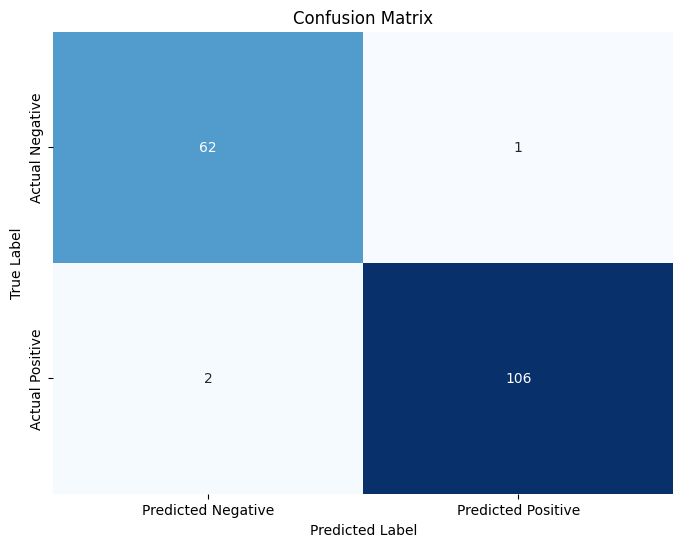

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Conclusion de l'analyse

Un modèle de régression logistique a été développé et évalué pour la classification binaire sur l'ensemble de données Breast Cancer Wisconsin.

Après pré-traitement des données, qui ont été normalisées, le modèle a été entraîné  et des prédictions ont été effectuées.

A partir des  fonctions implémentées "from scratch", les métriques d'évaluation suivantes ont été calculées sur l'ensemble de test :

*   **Accuracy (Précision globale) :** Indique la proportion d'instances correctement classifiées.
*   **Precision (Précision) :** Mesure la proportion de classifications positives correctes parmi toutes les classifications positives.
*   **Recall (Rappel ou Sensibilité) :** Mesure la proportion de classifications positives correctes parmi toutes les instances positives réelles.
*   **F1-Score :** Est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre les deux métriques.

La matrice de confusion visualisée confirme la répartition des vrais positifs, vrais négatifs, faux positifs et faux négatifs, nous donnant un aperçu détaillé des performances du modèle pour chaque classe.

Sur la base de ces métriques, nous pouvons évaluer l'efficacité du modèle de régression logistique pour cette tâche de classification spécifique.